# Problem 1

The link can be found here : https://piazza.com/class/k05u5i0wc3w540?cid=232

# Problem 2

##### Choose and critique one of the visualization by one of your fellow classmates for HW 1 Problem 2 (distribution of income across countries and continents over time). Include a link to the original. Describe the visualization and how it is similar and/or different from yours. Is it easy to interpret? Does it effectively visualize what is being asked? Why or why not?


Author : Omair Shafi Ahmed

Link : https://github.com/Omairss/ds5500_hw1/blob/master/Homework1.ipynb

Similarity / Difference : Omair's visualisation and my visualisation try to focus on distriubtion quite differently. He has plot a heat map where as I have tried to show the differences as a distribution plot. Moreover he has showcased the plot over all countries whereas I did it across continenets. 

Interpretability : The plots are little hard to interpret as they fell cluttered.

Effectivness : His plots are effective and showcase the right story. One could easily see the trend of GDP per captia increases.

# Problem 3


##### Choose and critique one of the visualization by one of your fellow classmates for HW 1 Problem 3 (relationship between income, life expectancy, and child mortality over time). Include a link to the original. Describe the visualization and how it is similar and/or different from yours. Is it easy to interpret? Does it effectively visualize what is being asked? Why or why not?


Author : Omair Shafi Ahmed

Link : https://github.com/Omairss/ds5500_hw1/blob/master/Homework1.ipynb

Similarity / Difference : We both have tried to show the correlation as density plots, however to see the overall effect of time on these variables he has plot contries on different time whereas my plots show the average of all countires.

Interpretability : The plots are interpretable and easy to read and understand.

Effectivness : One could easily find the growing trend in life expectancy and income, whereas drop in child mortality over time in his plots and hence making it very effective for the visual story we are trying to present

### Helper for Problem 4 and Problem 5

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error  


def modelHelper(model, X, Y, Xlab, Ylab):
    model.fit(X, Y)
    scr = 'MSE : ' + str(mean_squared_error(Y, model.predict(X)))
    print('Model Coefficent ' + str(model.coef_[0]))
    print('Model Intercept ' + str(model.intercept_))
    plt.scatter(X,Y,color='g')
    plt.plot(X,model.predict(X),color='k')
    plt.xlabel(Xlab)
    plt.ylabel(Ylab)
    plt.title(scr)
    plt.show()
    
gdp = pd.read_csv("../data/ddf--datapoints--gdppercapita_us_inflation_adjusted--by--geo--time.csv")
life = pd.read_csv('../data/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
cm = pd.read_csv('../data/ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv')
cont_map = pd.read_csv('../data/ddf--entities--geo--country.csv')    

df = pd.merge(gdp, life)
df = pd.merge(df, cm)
df = pd.merge(df,cont_map[['country', 'world_4region']], left_on = 'geo', right_on = 'country')
df.head()

,geo,time,gdppercapita_us_inflation_adjusted,life_expectancy_years,child_mortality_0_5_year_olds_dying_per_1000_born,country,world_4region
0,abw,2010,24271.94042,75.06,17.969,abw,americas
1,afg,2002,364.57057,52.43,122.200,afg,asia
2,afg,2003,376.75871,53.03,118.300,afg,asia
3,afg,2004,364.09544,53.50,114.400,afg,asia
4,afg,2005,389.41636,53.87,110.300,afg,asia


# Problem 4

##### Choose and fit one or more models to quantify the relationship betweem income (GDP per capita) and life expectancy over time. Justify your choice of model and comment on its appropriateness. (You are not required to handle the autocorrelation of time series, but should comment on how this impacts your analysis.) Visualize the model(s) and comment on what they tell you about the relationship between income and life expectancy over time.

In [2]:
gdp_life = df.groupby('time').mean().reset_index()\
                [['time','gdppercapita_us_inflation_adjusted', 'life_expectancy_years']]

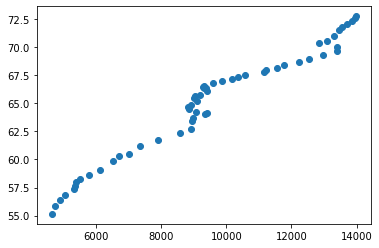

,time,gdp,life
time,1.000000,0.975161,0.983437
gdp,0.975161,1.000000,0.979056
life,0.983437,0.979056,1.000000


In [3]:
gdp_life.columns = ['time', 'gdp', 'life']
plt.plot(gdp_life['gdp'], gdp_life['life'], 'o')
plt.show()
gdp_life.corr()

Model Coefficent 0.0016804489866959183
Model Intercept 49.06927889428748


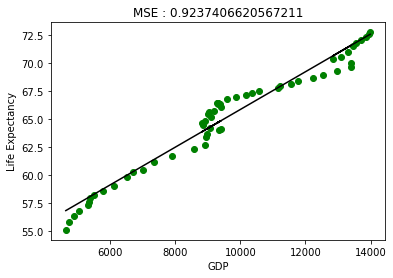

In [4]:
X = gdp_life['gdp'].values.reshape(-1, 1)
Y = gdp_life['life'].values
modelHelper(LinearRegression(), X, Y, 'GDP', 'Life Expectancy')

Since there exist a high correlation between the GDP and the life expectancy it is easy to estimate the relationship via a linear model. As one can see the model is able to estimate the relationship quite well. 

# Problem 5

##### Choose and fit one or more models to quantify the relationship betweem income (GDP per capita) and child mortality over time. Justify your choice of model and comment on its appropriateness. (You are not required to handle the autocorrelation of time series, but should comment on how this impacts your analysis.) Visualize the model(s) and comment on what they tell you about the relationship between income and child mortality over time.

In [5]:
gdp_child = df.groupby('time').mean().reset_index()\
            [['time','gdppercapita_us_inflation_adjusted', 'child_mortality_0_5_year_olds_dying_per_1000_born']]


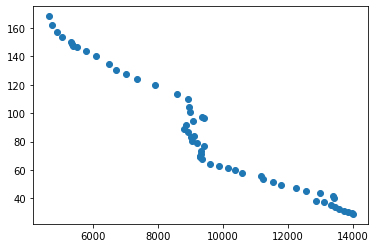

,time,gdp,child
time,1.000000,0.975161,-0.985772
gdp,0.975161,1.000000,-0.970164
child,-0.985772,-0.970164,1.000000


In [6]:
gdp_child.columns = ['time', 'gdp', 'child']
plt.plot(gdp_child['gdp'], gdp_child['child'], 'o')
plt.show()
gdp_child.corr()

Model Coefficent -0.014525108967053914
Model Intercept 223.47591863374808


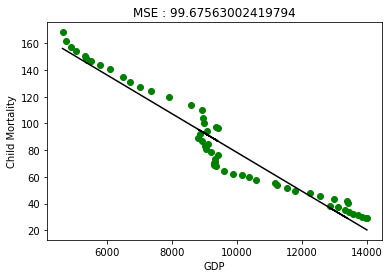

In [7]:
X = gdp_child['gdp'].values.reshape(-1, 1)
Y = gdp_child['child'].values
modelHelper(LinearRegression(), X, Y, 'GDP', 'Child Mortality')

Similar to GDP and Life expectancy, GDP and child mortality too have a high correlation. Using a linear model again delivers a good estimate of the relationship between the two variables. It is intresting to see the steady drop in the child mortality rate as overall gdp increases.